

# Project Overview

This project analyzes the results of an A/B test after which we present data-driven recommendations based on our findings.



# Table of contents

- [Project Logistics](#project-background) 
- [Project Background](#project-background) 
- [Data preparation](#data-preparation) 
- [Experiment Design](#experiment-design)
- [Functions](#functions) 
- [Hypothesis Test: Average Spent Per User](#hypothesis-test-average-spent-per-user) 
- [Hypothesis Test: User Conversion Rate](#hypothesis-test-user-conversion-rate)
- [Results]() 



# Project Logistics

* **Part 1:** Review inferential statistics and create analysis plan.

* **Part 2:** Analyze the A/B test results to determine whether or not the experiments where successfull

* **Part 3:** Record a presentation of the A/B test results and create a written report. 



# Project Background 

The e-commerce company Glowbox specializes in sourcing unique and high-quality prodects from around the world. 

The company is primarily known amongst its customer base for boutique fashion items and high-end decor products. However, their food and drink offerings have grown tremendously in the last few months, and the company wants to bring awareness to this product category to increase revenue.

The Growth team decided to run an A/B test that highlights key products in the food and drink category as a banner at the top of the website. 

> An A/B test is an experimentation technique used by businesses to compare two versions of a webpage, advertisement, or product feature to determine which one performs better. By randomly assigning customers or users to either the A or B version, the business can determine which version is more effective at achieving a particular goal.


<div>
<img src="gloxbox_banner.png" width="700"/>
</div>


# Data Preparation



# Experiment Design

# Functions 

In [103]:


import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Hypothesis Test: Average Spent Per User

# Hypothesis Test: User Conversion Rate

In [84]:
df = pd.read_csv("query_results.csv")

In [85]:
df.head()

,id,group,total_spent_per_user
0,1014313,B,0.0
1,1029532,B,0.0
2,1018168,A,0.0
3,1029599,A,0.0
4,1025920,B,0.0


# $H_0$: The control and treatment group's average spent will remain the same. 

In [86]:
def get_mean_and_se(df, col):

    mean = df[col].mean()
    se = df[col].std()/np.sqrt(len(df))
    return mean, se

In [88]:
def critical_value(sig, dof, test_kind='two-tail'):
    '''Calculate critical value for various tests.

    Parameters:
    -----------
    sig: float
        Significance level between 0 and 1 e.g. 0.05
    dof: int
        Degrees of freedom i.e. number of data points - 1
    test_kind: string
        Type of test i.e. left, right, two-tail. 
        Default is two-tail. 

    Returns: 
    --------
    critical_value: float 
        The critical value.'''
    from scipy.stats import t
    if test_kind == 'left':
        crit = t.ppf(q=sig, df=dof)
    elif test_kind == 'right':
        crit = t.ppf(q=1-sig, df=dof)
    else:
        print(f'{sig=} {dof=}')
        crit = t.ppf(q=1-sig/2, df=dof)
    return crit

In [90]:
def confidence_interval(mean, se, critical_value):
    ''' '''

    lower = mean - critical_value * se
    upper = mean + critical_value * se
    return lower, upper 

In [99]:
def t_test_statistic_1_samp (sample, sample_col, hypothesis_mean):
    '''Calculates a t-test for one sample.
       T = (x̄ - μ₀) / (s / √n)
     
    Parameters:
    -----------
    sample: df
        This is you sample dataframe.
    sample_col: string
        This is the column to be aggregated. 
    hypothesis_mean: float
        μ₀: This is the hypothesized population mean, which is the value you want to test against.
    
    Returns:
    --------
    T: float
        This is the calculated t-value, which measures the difference between the sample mean (x̄) 
        and the hypothesized population mean (μ₀) in units of the standard error of the sample mean.
        The resulting t-value is compared to a t-distribution to determine the probability of 
        observing such a large difference between the sample mean and the hypothesized population mean 
        by chance alone. If this probability is low enough (usually set at a significance level of 0.05), 
        we reject the null hypothesis that the sample mean is not significantly different 
        from the hypothesized population mean.
    
    '''
    sample_n = len(sample)
    mean, se = get_mean_and_se(sample, sample_col)

    t_1_samp = (mean - hypothesis_mean) / se
    return t_1_samp

In [93]:
def t_test_statistic_2_samp (sample_1, sample_2, col_1, col_2, hypothesis_mean=0):
    
    '''Calculates a t-test for two independent samples. which is a statistical test used to determine 
    whether two groups of data are significantly different from each other.
    
    Parameters:
    -----------
    sample_1: dataframe
        This is the first dataframe used for computing the mean and standard error.
    sample_2: dataframe
        This is the second dataframe used for computing the mean and standard error.
    col_1: string
        This is the column used for analysis within the first dataframe.
    col_2: string
        This is the column used for analysis within the second dataframe. 
    hypothsis_mean: float
        Represents the null hypothesis mean, which is the value being tested against the sample means to 
        determine whether the difference between them is statistically significant. 
        The default is 0. 

    Returns:
    --------
    
    '''
    mean_1, se_1 = get_mean_and_se(sample_1, col_1)
    mean_2, se_2 = get_mean_and_se(sample_2, col_2)

    t_2_samp = ((mean_1 - mean_2) - hypothesis_mean) / np.sqrt((se_1**2 + se_2**2))
    return t_2_samp


In [ ]:
def confidence_interval_diff_mean(control_sample, treamtent_sample, col_1, col_2, sig):
    ''' '''

    control_mean, se_1 = get_mean_and_se(control_sample, col_1)
    treatment_mean, se_2 = get_mean_and_se(treamtent_sample, col_2)
    dof = (len(control_sample) - 1) + (len(treamtent_sample) - 1)
    test_kind = 'two-tail'


    sample_stat = treatment_mean - control_mean
    se = np.sqrt(se_1**2 + se_2**2)

    crit_value = critical_value(sig, dof, test_kind='two-tail')

    lower = sample_stat - crit_value * se
    upper = sample_stat + crit_value * se

    print(f'{sample_stat=}, {se=}, {crit_value=}')

    return lower, upper 

In [121]:
# Isolate the data for the Control group: A

df_a = df[df["group"]=="A"]

# Isolate the data for the Treatment group: B

df_b = df[df["group"]=="B"]

# Set the significance level (alpha) to 5%
# Giving us a confidence level of 95%

sig = 0.05

# Calculate the mean and standard error of the Control Group: A

mean_a, se_a = get_mean_and_se(df_a, "total_spent_per_user")

# Calculate the mean and standard error of the Control Group: A

mean_b, se_b = get_mean_and_se(df_b, "total_spent_per_user")

# Print means and standard errors
print(f'{mean_a=}, {se_a=},\n{mean_b=}, {se_b=}')


critical_a = critical_value(sig, dof=len(df_a) - 1)
critical_b = critical_value(sig, dof=len(df_b) - 1)

confidence_interval_a = confidence_interval(mean_a, se_a, critical_a)
confidence_interval_b = confidence_interval(mean_b, se_b, critical_b)


print(f'Group A: {np.round(confidence_interval_a, 3)}')
print('Group B: {:.4}, {:.4}'.format(*confidence_interval_b))


t_stat_2_samp = t_test_statistic_2_samp(df_a, df_b, 'total_spent_per_user', 'total_spent_per_user', 0)

print("t-statistic = ", t_stat_2_samp)

# Conduct t-test assuming unequal variance
t_stat, p_val = ttest_ind(df_a['total_spent_per_user'], df_b['total_spent_per_user'], equal_var=False)

# Print results
print("t-statistic:   {}".format(t_stat))
print("p-value: {}".format(p_val))

# Check significance level at 5%
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis")
else:
    print("Conclusion: Fail to reject the null hypothesis")


ci_diff_mean = confidence_interval_diff_mean(df_a, df_b, 'total_spent_per_user', 'total_spent_per_user', 0.05)

print(ci_diff_mean)



mean_a=3.3745184679288442, se_a=0.16623500765257104,
mean_b=3.390866945885783, se_b=0.16203444463703556
sig=0.05 dof=24342
sig=0.05 dof=24599
Group A: [3.049 3.7  ]
Group B: 3.073, 3.708
t-statistic =  -0.0704249099975012
t-statistic:   -0.07042490999751674
p-value: 0.943855753172874
Conclusion: Fail to reject the null hypothesis
sig=0.05 dof=48941
sample_stat=0.016348477956938723, se=0.23214055875284462, crit_value=1.9600124577813611
(-0.4386499091549627, 0.47134686506884016)


In [111]:
# to get two sided p-value
# 2 * (1 - t.cdf(absolute(t-statistic), dof))

2*(1-t.cdf(np.abs(t_stat_2_samp), df=np.min([len(df_a)-1, len(df_b)-1])))

0.9438560436782142

In [119]:
# to get two sided p-value
# 2 * (1 - t.cdf(absolute(t-statistic), dof))

print(2*(1-t.cdf(np.abs(t_stat_2_samp), df=np.min([len(df_a)-1, len(df_b)-1]))))
print(2*(1-t.cdf(np.abs(0.07042490999751674), df=np.min([len(df_a)-1, len(df_b)-1]))))

0.9438560436782142
0.9438560436782018


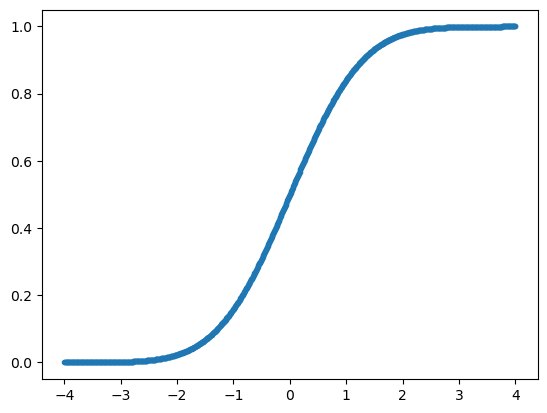

In [108]:
ts = np.linspace(-4, 4, 1000)
cdf = t.cdf(ts, df=200)
plt.plot(ts, cdf, '.')

In [122]:
# What is the user conversion rate for the control and treatment groups?


def conversion_rate(df, col):

    con_rate = len(df[df[col] != 0]) / len(df)

    return con_rate

In [134]:
conversion_a = conversion_rate(df_a, "total_spent_per_user")

conversion_a

conversion_b = conversion_rate(df_b, "total_spent_per_user")

# mean proportion

print(f"{conversion_a = :.4f}\n{conversion_b = :.4f}")

conversion_a = 0.0392
conversion_b = 0.0463


In [ ]:
# set the significance level to 5%

sig = 0.05

In [142]:
def proportion_stats(df, col):

    sample_statistic = len(df[df[col] != 0]) / len(df)
    se = np.sqrt(sample_statistic*(1-sample_statistic)/len(df))
    
    return sample_statistic, se

In [143]:
def critical_value_proportion(sig, test_kind='two-tail'):

    '''Calculate critical value for various tests.

    Parameters:
    -----------
    sig: float
        Significance level between 0 and 1 e.g. 0.05
    test_kind: string
        Type of test i.e. left, right, two-tail. 
        Default is two-tail. 

    Returns: 
    --------
    critical_value: float 
        The critical value.'''
    from scipy.stats import norm
    if test_kind == 'left':
        crit = norm.ppf(q=sig)
    elif test_kind == 'right':
        crit = norm.ppf(q=1-sig)
    else:
        crit = norm.ppf(q=1-sig/2)
    return crit

In [147]:
df_a_sample_stat, df_a_prop_se = proportion_stats(df_a, "total_spent_per_user")
df_b_sample_stat, df_b_prop_se = proportion_stats(df_b, "total_spent_per_user")


critical_df_a = critical_value_proportion(sig)
critical_df_b = critical_value_proportion(sig)


print(f'{critical_df_a = :.4f} \n{df_a_sample_stat = :.4f} \n{df_a_prop_se = :.4f} \n{critical_df_b = :.4f} \n{df_b_sample_stat = :.4f} \n{df_b_prop_se = :.4f}')

critical_df_a = 1.9600 
df_a_sample_stat = 0.0392 
df_a_prop_se = 0.0012 
critical_df_b = 1.9600 
df_b_sample_stat = 0.0463 
df_b_prop_se = 0.0013


In [154]:
df_a_proportion_conf = confidence_interval(df_a_sample_stat, df_a_prop_se, critical_df_a)

print('df_a_proportion_conf = {:.4f}, {:.4f}'.format(*df_a_proportion_conf))

df_a_proportion_conf = 0.0368, 0.0417


In [155]:
df_b_proportion_conf = confidence_interval(df_b_sample_stat, df_b_prop_se, critical_df_b)

print('df_b_proportion_conf = {:.4f}, {:.4f}'.format(*df_b_proportion_conf))

df_b_proportion_conf = 0.0437, 0.0489


Conduct a hypothesis test to see whether there is a difference in the conversion rate between the two groups. What are the resulting p-value and conclusion?
Use the normal distribution and a 5% significance level. Use the pooled proportion for the standard error.

In [175]:
def pooled_t_statistic(p1 , p2, df1, df2 ):

    '''Computes the pooled t-statistic for two independent samples with known proportions.

    Parameters
    ----------
    p1 : float
        Proportion of successes in sample 1.
    p2 : float
        Proportion of successes in sample 2.
    df1 : array-like
        Sample 1.
    df2 : array-like
        Sample 2.

    Returns
    -------
    pooled_t : float
        The pooled t-statistic.

    Notes
    -----
    The pooled t-statistic is used to test the hypothesis that two independent samples have equal population means. It assumes that the variances of the two populations are equal. The formula for the pooled t-statistic is:
    pooled_t = (p1 - p2) / sqrt(p * (1 - p) * (1 / n1 + 1 / n2))

        where:

            - p is the pooled proportion of successes
            - n1 and n2 are the sample sizes of sample 1 and sample 2, respectively'''


    n1 = len(df1)
    n2 = len(df2)

    p = (p1 * n1 + p2 * n2) / (n1 + n2)

    pooled_t = (p1-p2) / np.sqrt( p*(1-p) * (1/n1 + 1/n2) )

    return pooled_t

In [176]:
pooled_t_stat = pooled_t_statistic(df_a_sample_stat, df_b_sample_stat, df_a, df_b)

print(pooled_t_stat)

-3.864291770414927


In [177]:
2*(1-norm.cdf(np.abs(pooled_t_stat),))

0.00011141198532937935

What is the 95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)?
Use the normal distribution and unpooled proportions for the standard error.

In [178]:
def se_unpooled_prop(p1 , p2, df1, df2):
    '''Computes the unpooled standard-error for z-interval for two independent samples with known proportions.

    Parameters
    ----------
    p1 : float
        Proportion of successes in sample 1.
    p2 : float
        Proportion of successes in sample 2.
    df1 : array-like
        Sample 1.
    df2 : array-like
        Sample 2.

    Returns
    -------
    unpooled_se : float
        The unpooled standard-error.'''
    
    n1 = len(df1)
    n2 = len(df2)
    
    unpooled_se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))

    return unpooled_se

In [181]:
diff_prop_se = se_unpooled_prop(df_a_sample_stat , df_b_sample_stat, df_a, df_b)

diff_prop_se

0.0018284884033368863

In [184]:
diff_prop_conf = confidence_interval((df_b_sample_stat - df_a_sample_stat), diff_prop_se, critical_df_a)

diff_prop_conf

(0.0034860511629807105, 0.0106535939963596)

In [ ]:
def unpooled_t_statistic(p1 , p2, df1, df2 ):

    '''Computes the unpooled t-statistic for two independent samples with known proportions.

    Parameters
    ----------
    p1 : float
        Proportion of successes in sample 1.
    p2 : float
        Proportion of successes in sample 2.
    df1 : array-like
        Sample 1.
    df2 : array-like
        Sample 2.

    Returns
    -------
    pooled_t : float
        The pooled t-statistic.'''


    n1 = len(df1)
    n2 = len(df2)

    

    return unpooled_t